In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

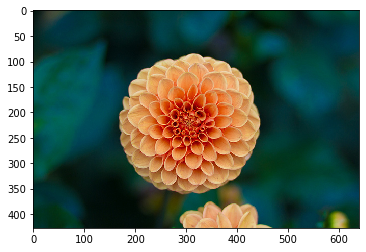

In [16]:
from sklearn.datasets import load_sample_image
pic = load_sample_image('flower.jpg')
pic.shape   #(427, 640, 3)
plt.axes().imshow(pic)

In [17]:
# preprocessing
data = pic/255
data = data.reshape( data.shape[0] * data.shape[1] , data.shape[2] )
data.shape  #(273280, 3) 


(273280, 3)

In [18]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

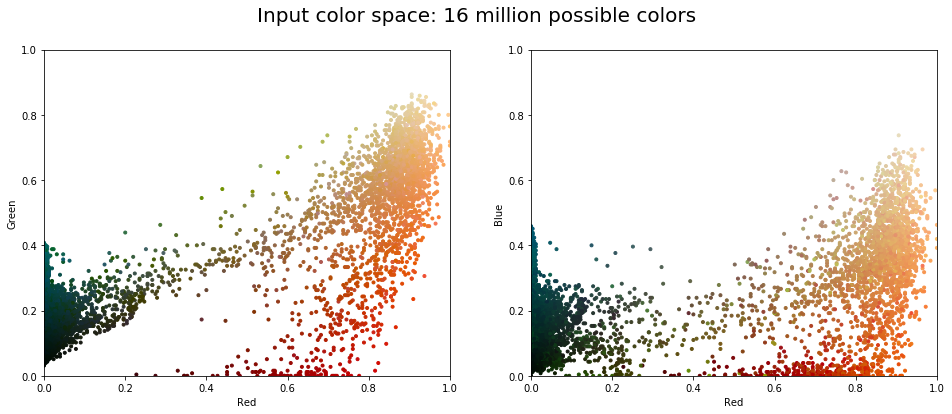

In [19]:
plot_pixels(data, title='Input color space: 16 million possible colors')

In [25]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
# kmeans.predict(data)
new_colors=kmeans.cluster_centers_[kmeans.predict(data)]


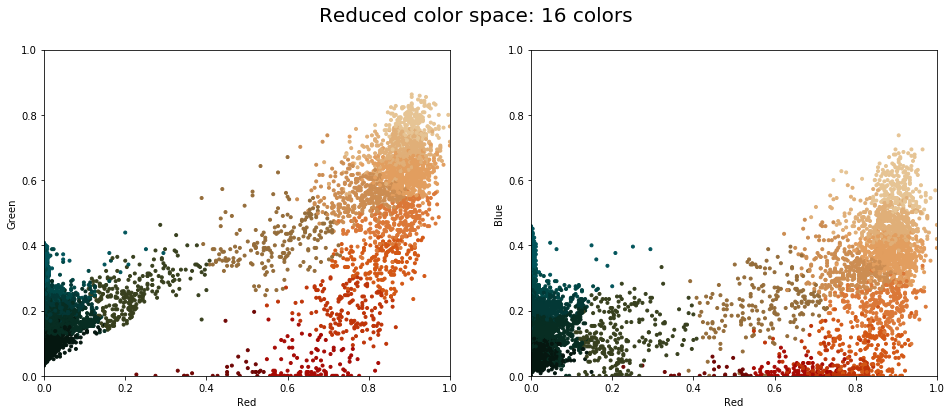

In [26]:
plot_pixels(data, colors = new_colors, title="Reduced color space: 16 colors")

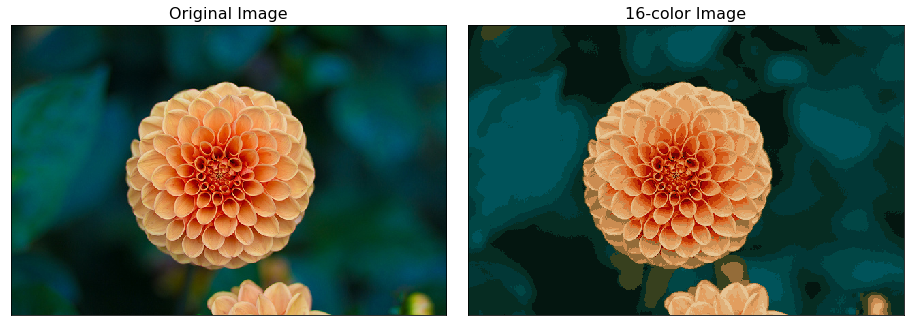

In [28]:
china_recolored = new_colors.reshape(pic.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(pic)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);